In [60]:
#pandas
import pandas as pd

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
import warnings
warnings.filterwarnings('ignore')

In [61]:


thyroid_df = pd.read_csv('/home/googlyji/ml_projects/ml projects /thyroid/notebook/data/hypothyroid.csv')
thyroid_df.head()



,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [62]:


thyroid_df.rename(columns={'binaryClass':'Label'},inplace=True)



In [63]:


thyroid_df.replace('?',np.nan,inplace=True)



In [64]:
thyroid_df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

In [65]:


thyroid_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3771 non-null   object
 1   sex              3622 non-null   object
 2   sick             3772 non-null   object
 3   pregnant         3772 non-null   object
 4   thyroid surgery  3772 non-null   object
 5   I131 treatment   3772 non-null   object
 6   lithium          3772 non-null   object
 7   goitre           3772 non-null   object
 8   tumor            3772 non-null   object
 9   TSH              3403 non-null   object
 10  T3               3003 non-null   object
 11  TT4              3541 non-null   object
 12  T4U              3385 non-null   object
 13  FTI              3387 non-null   object
 14  Label            3772 non-null   object
dtypes: object(15)
memory usage: 442.2+ KB


In [66]:


thyroid_df['thyroid surgery'].value_counts()



thyroid surgery
f    3719
t      53
Name: count, dtype: int64

In [67]:


cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
    thyroid_df[i] = pd.to_numeric(thyroid_df[i])



In [68]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   object 
 3   pregnant         3772 non-null   object 
 4   thyroid surgery  3772 non-null   object 
 5   I131 treatment   3772 non-null   object 
 6   lithium          3772 non-null   object 
 7   goitre           3772 non-null   object 
 8   tumor            3772 non-null   object 
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  Label            3772 non-null   object 
dtypes: float64(6), object(9)
memory usage: 442.2+ KB


In [69]:


thyroid_df.isnull().sum()



age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Label                0
dtype: int64

In [70]:


miss_cols = ['FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    thyroid_df[i] = thyroid_df[i].fillna(thyroid_df[i].mean())



In [71]:
thyroid_df.dropna(inplace=True)

In [72]:
thyroid_df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Label              0
dtype: int64

In [73]:
thyroid_df = thyroid_df.drop(1364)

In [74]:
thyroid_df.TT4 = thyroid_df.TT4.astype(int)
thyroid_df.FTI = thyroid_df.FTI.astype(int)
thyroid_df.age = thyroid_df.age.astype(int)

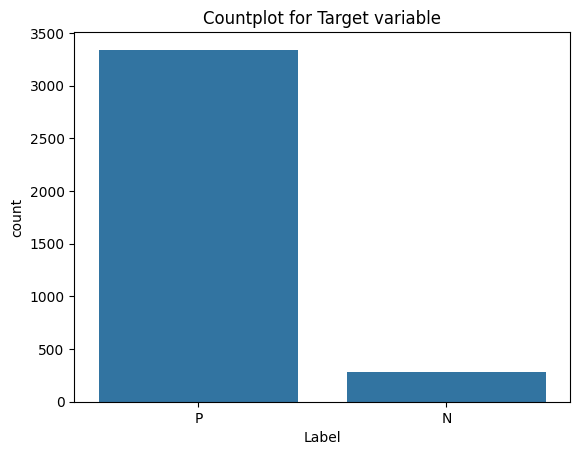

In [75]:


sns.countplot(x='Label',data=thyroid_df)
plt.title("Countplot for Target variable");



In [76]:
positive_df = thyroid_df[thyroid_df.Label=='P']

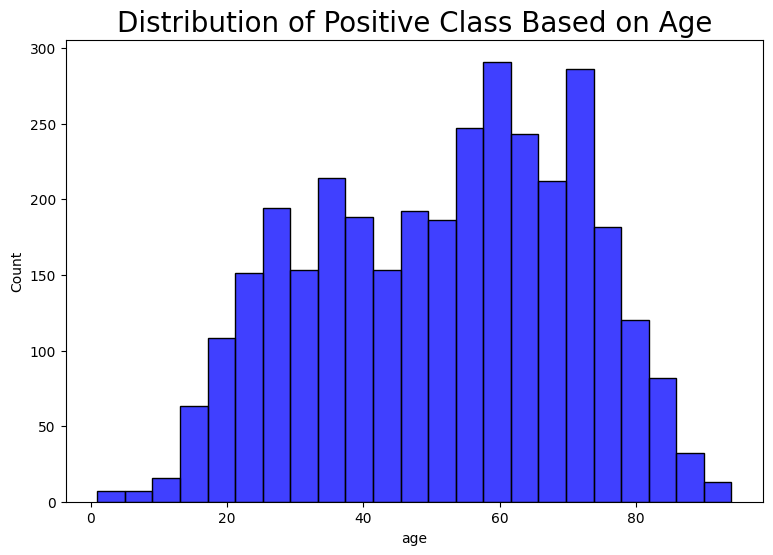

In [77]:


plt.figure(figsize=(9,6))
sns.histplot(x='age',data=positive_df,color='blue')
plt.title("Distribution of Positive Class Based on Age",{'fontsize':20});



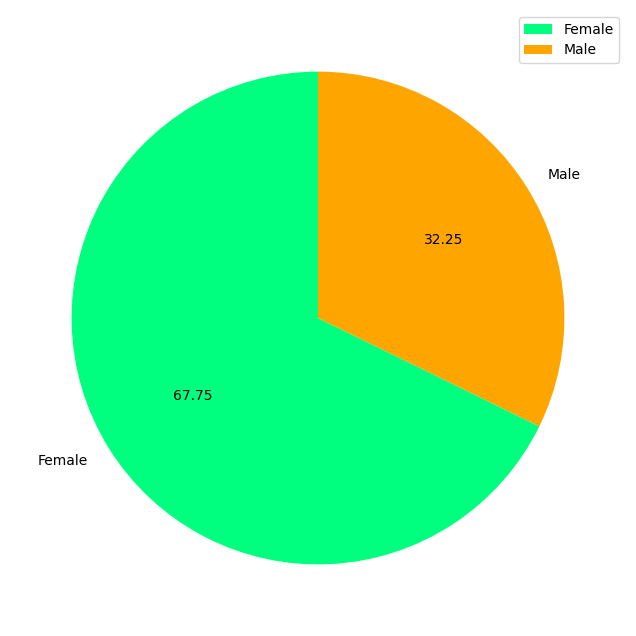

In [78]:
plt.figure(figsize=(10,8))
plt.pie(x=positive_df.sex.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['springgreen','orange'],
        autopct='%.2f'
       );
plt.legend();


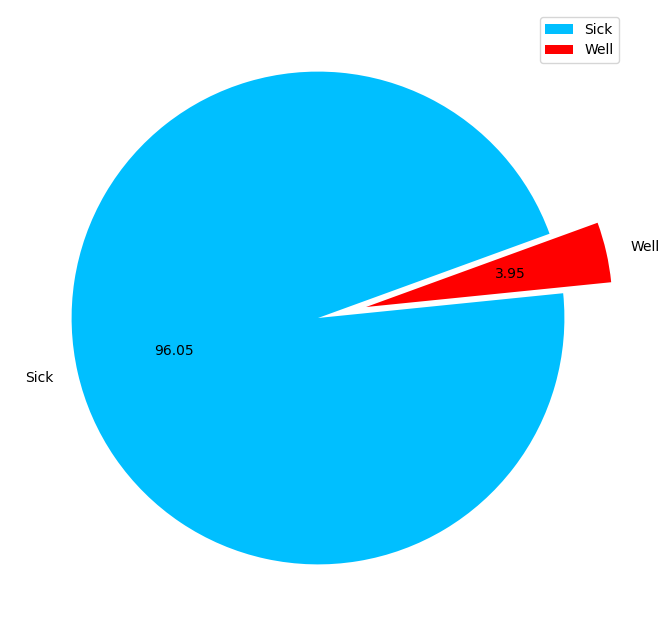

In [79]:


plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sick.value_counts(),
        labels=['Sick','Well'],
        startangle = 20,
        colors=['deepskyblue','red'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();



In [80]:
thyroid_df.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Label
0,41,F,f,f,f,f,f,f,f,1.30,2.5000,125,1.140,109,P
1,23,F,f,f,f,f,f,f,f,4.10,2.0000,102,0.995,110,P
2,46,M,f,f,f,f,f,f,f,0.98,2.0135,109,0.910,120,P
3,70,F,f,f,f,f,f,f,f,0.16,1.9000,175,0.995,110,P
4,70,F,f,f,f,f,f,f,f,0.72,1.2000,61,0.870,70,P


In [81]:
def func(df):
    if df == 'P':
        return 1
    else:
        return 0

In [82]:
thyroid_df['Label']=thyroid_df['Label'].apply(func)

In [83]:
thyroid_df

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Label
0,41,F,f,f,f,f,f,f,f,1.300000,2.5000,125,1.140,109,1
1,23,F,f,f,f,f,f,f,f,4.100000,2.0000,102,0.995,110,1
2,46,M,f,f,f,f,f,f,f,0.980000,2.0135,109,0.910,120,1
3,70,F,f,f,f,f,f,f,f,0.160000,1.9000,175,0.995,110,1
4,70,F,f,f,f,f,f,f,f,0.720000,1.2000,61,0.870,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,t,5.086766,2.0135,108,0.995,110,1
3768,68,F,f,f,f,f,f,f,f,1.000000,2.1000,124,1.080,114,1
3769,74,F,f,f,f,f,f,f,f,5.100000,1.8000,112,1.070,105,1
3770,72,M,f,f,f,f,f,f,f,0.700000,2.0000,82,0.940,87,1


In [84]:
thyroid_df.to_csv("/home/googlyji/ml_projects/ml projects /thyroid/notebook/new_Data/data.csv",index=False)

In [85]:


X = thyroid_df.drop('Label',axis=1)
y = thyroid_df.Label



In [196]:
s_encoder = LabelEncoder()
si_encoder = LabelEncoder()
preg_encoder = LabelEncoder()
th_encoder = LabelEncoder()
treat_encoder = LabelEncoder()
lith_encoder = LabelEncoder()
g_encoder= LabelEncoder()
tu_encoder = LabelEncoder()

In [197]:
X['sex'] = s_encoder.fit_transform(X.sex)
X['I131 treatment'] = treat_encoder.fit_transform(X['I131 treatment'])
X['sick'] = si_encoder.fit_transform(X.sick)
X['pregnant'] = preg_encoder.fit_transform(X.pregnant)
X['thyroid surgery'] = th_encoder.fit_transform(X['thyroid surgery'])
X['lithium'] = lith_encoder.fit_transform(X['lithium'])
X['goitre'] = g_encoder.fit_transform(X['goitre'])
X['tumor'] = tu_encoder.fit_transform(X['tumor'])

In [200]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)


In [201]:


smote = SMOTE(random_state=11)

x_smote, y_smote = smote.fit_resample(X_train, y_train)



In [202]:
print("Shape before the Oversampling : ",X_train.shape)
print("Shape after the Oversampling : ",x_smote.shape)

Shape before the Oversampling :  (2896, 14)
Shape after the Oversampling :  (5340, 14)


In [203]:


scalr = MinMaxScaler()
x_smote.TT4 = scalr.fit_transform(x_smote[['TT4']])
x_smote.age = scalr.fit_transform(x_smote[['age']])
x_smote.FTI = scalr.fit_transform(x_smote[['FTI']])



In [204]:


#with open('scalar.pkl','wb') as f:
#    pickle.dump(scalr,f)



In [205]:
X_test

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI
1620,62,0,1,0,0,0,0,0,0,11.0,0.8000,73,0.740,98
368,29,0,0,0,1,0,0,0,0,24.0,2.0135,63,1.200,53
3672,41,0,0,0,0,0,0,0,0,0.7,2.2000,104,1.020,102
786,60,0,0,0,0,0,0,0,0,0.6,2.4000,101,1.180,86
2984,83,0,1,0,0,0,0,0,0,2.5,2.0135,118,0.970,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,35,0,0,0,0,0,0,0,0,0.4,2.0135,135,0.840,160
3203,61,0,0,0,0,0,0,0,0,1.3,1.7000,91,0.980,93
55,77,1,0,0,0,0,0,0,0,2.0,2.9000,151,1.350,111
867,68,1,1,0,0,0,0,0,0,6.7,1.4000,101,0.995,110


In [207]:


X_test.TT4 = scalr.fit_transform(X_test[['TT4']])
X_test.age = scalr.fit_transform(X_test[['age']])
X_test.FTI = scalr.fit_transform(X_test[['FTI']])



In [208]:


models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    SVC():"Support Vector Machine",
    RandomForestClassifier():'Random Forest'
}
for m in models.keys():
    m.fit(x_smote,y_smote)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")



Accuracy Score for Logistic Regression is :  97.65193370165746 %
Accuracy Score for Support Vector Machine is :  98.20441988950276 %
Accuracy Score for Random Forest is :  96.27071823204419 %


In [209]:


for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}")  
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")



Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        54
           1       0.98      0.99      0.99       670

    accuracy                           0.98       724
   macro avg       0.94      0.89      0.91       724
weighted avg       0.98      0.98      0.98       724

----------------------------------------------------------
Classification Report for Support Vector Machine
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        54
           1       1.00      0.98      0.99       670

    accuracy                           0.98       724
   macro avg       0.91      0.98      0.94       724
weighted avg       0.98      0.98      0.98       724

----------------------------------------------------------
Classification 

In [ ]:
thyroid_df.to_csv("/home/googlyji/ml_projects/ml projects /thyroid/notebook/new_Data/data.csv")